## Estudo de caso em recomendação

Autor: Natália Antunes
_________________________________________________________

Este trabalho tem por objetivo criar recomendações de músicas que estão disponíveis no aplicativo Spotify. 
O dataset utlizado neste estudo de caso é o  [Audio Features of Tracks](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks), disponível no [Kaggle](https://www.kaggle.com).

De acordo com a documentação referenciada no [Spotify](https://developer.spotify.com/documentation/web-api/reference/#objects-index), segue a descrição das variáveis disponíveis neste dataset:

* **year**: The year the episode was first released
* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **artists**: The artists who performed the track. Each artist object includes a link in href to more detailed information about the artist. 
* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* **duration_ms**:The track length in milliseconds.
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* **explicit**: Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).
* **id**: The Spotify ID for the playlist.
* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* **name**: The name of the track.
* **popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.
* **release_date**: The date the episode was first released, for example "1981-12-15". Depending on the precision, it might be shown as "1981" or "1981-12".
* **speechiness**:Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.



## **Estudo de caso**

## Preparação dos Dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Carregando o dataset
url='https://drive.google.com/file/d/1DleTa-37tbz3KaopB0HrKgzSmxyuzn5C/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.shape

(170653, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
## Transformação da variável artista
## Essa trasnformação foi obtida em pesquisa realizada online
def string_to_list(input_string):
    list_of_strings = list()
    
    if len(input_string) == 2:  # Skip empty lists 
        return list_of_strings

    strings = input_string[1:-1]  # Cut off the brackets
    
    strings = strings.split(', ')
    for string in strings:
        string = string.replace(' ', '_')
        string = string[1:-1]  # Cut off the apostrophes
        list_of_strings.append(string)
    
    return list_of_strings

df['artists_upd'] =df['artists'].apply(string_to_list)
df['artists_upd'].values[0][0]


'Sergei_Rachmaninoff'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

## Análise Descritiva

In [7]:
## Descrição das variáveis contínuas do dataset
df.describe() 

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


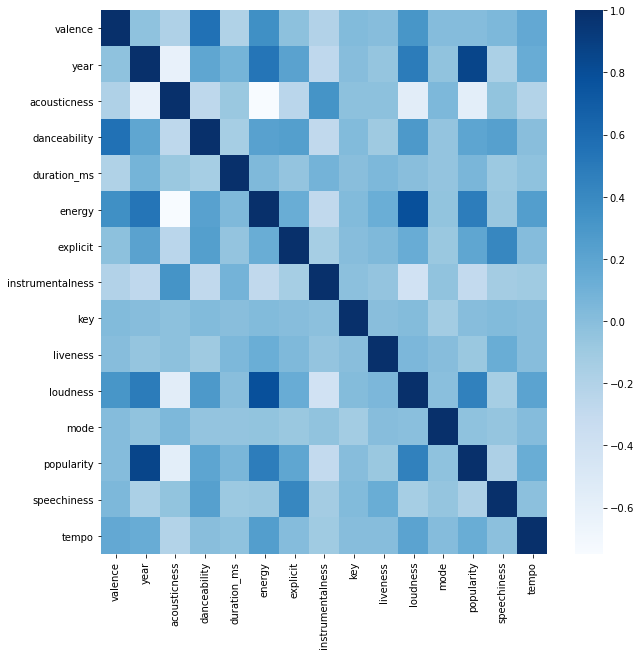

In [8]:
# visualizar correlação entre as variáveis
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues')
plt.show()

Lançamento de músicas por ano de 1921 até 2020


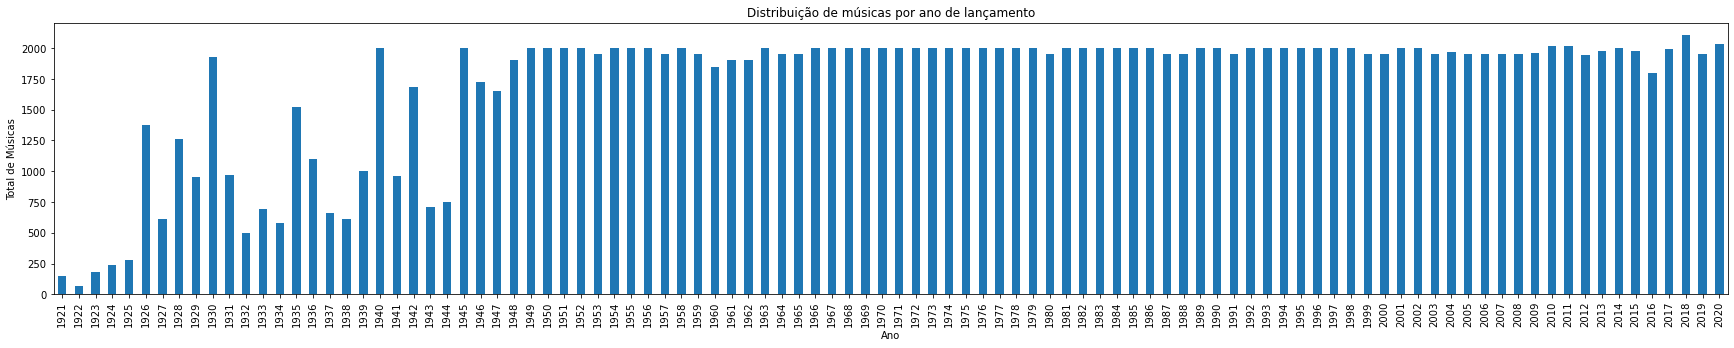

In [9]:
## Ano lançamento da música
print (f"Lançamento de músicas por ano de {min(df.year)} até {max(df.year)}")
pd.Series(df.year).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("Distribuição de músicas por ano de lançamento")
plt.ylabel("Total de Músicas")
plt.xlabel("Ano")
plt.show()

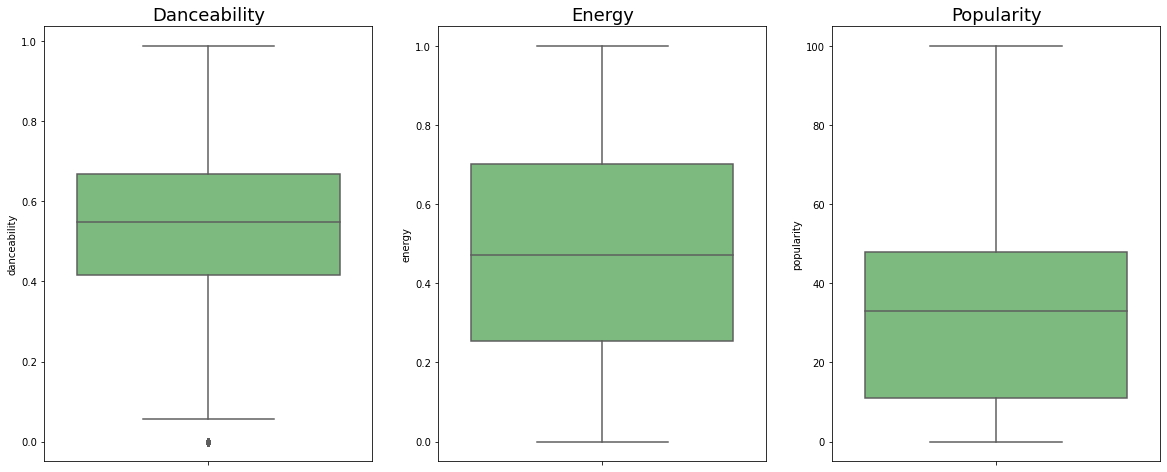

In [10]:
## Plot Variáveis Relacionadas aos Canais de Venda da Empresa
plt.figure(figsize = (20, 8))

plt.subplot(131)
sns.boxplot(y= 'danceability' , data = df, palette="Greens")
plt.title('Danceability',fontsize=18)

plt.subplot(132)
sns.boxplot(y= 'energy' , data = df, palette="Greens")
plt.title('Energy',fontsize=18)

plt.subplot(133)
sns.boxplot(y= 'popularity' , data = df, palette="Greens")
plt.title('Popularity',fontsize=18)

plt.show()
## Observar que no que tange à popularidade da música, há uma maior dispersao dos dados

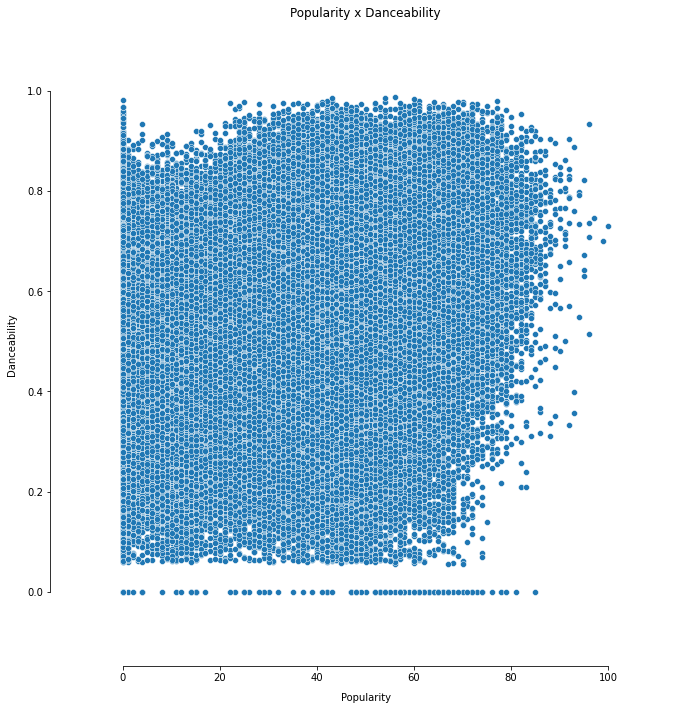

In [11]:
# Grafico relacionando a popularidade da música com a "Danceability".
ps=sns.relplot(x="popularity", y="danceability",data=df)
ps.set_axis_labels("Popularity", "Danceability", labelpad=10)
ps.set(title='Popularity x Danceability')
ps.fig.set_size_inches(10, 10)
ps.ax.margins(.15)
ps.despine(trim=True)
plt.show()

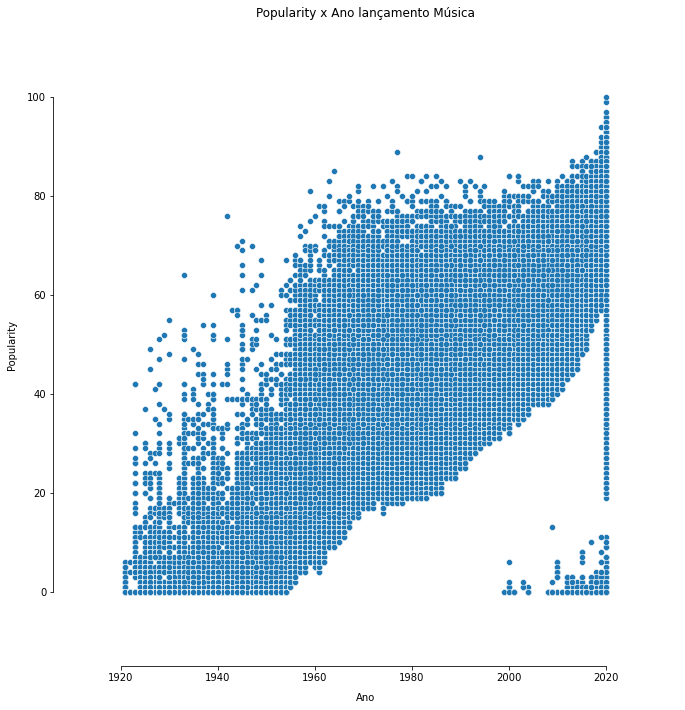

In [12]:
# Grafico relacionando a popularidade da música com o Ano de Lançamento. 
ps=sns.relplot(x="year",y="popularity",data=df)
ps.set_axis_labels("Ano", "Popularity", labelpad=10)
ps.set(title='Popularity x Ano lançamento Música')
ps.fig.set_size_inches(10, 10)
ps.ax.margins(.15)
ps.despine(trim=True)
plt.show()
## Aparentemente há uma tendencia linear crescente da popularidade e ano de lançamento.

## 1ª Recomendação - Baseada na popularidade da música

A popularidade da música é calculada de acordo com o algoritmo do Spotify e é baseada na quantidade de vezes que a música foi tocada. Neste dataset, uma música pode aparecer mais de uma vez, entretanto isso ocorre quando a música foi regravada por um artista diferente ou numa nova versão da música, por exemplo. 
Observa-se que o TOP 10 de músicas mais populares é composto por faixas lançadas no ano de 2020. Essa observação abre margem para explorar outras recomendaçoes como: popularidade de acordo com o ano de lançamento, recomendação baseada na popularidade de aco

In [13]:
## Top-10 músicas mais populares - Independende do ano de lançamento
colunas = ['name','artists','artists_upd','year','release_date', 'popularity']
df[colunas].sort_values(by='popularity', ascending = [False]).head(10)

,name,artists,artists_upd,year,release_date,popularity
19611,Dakiti,"['Bad Bunny', 'Jhay Cortez']","[Bad_Bunny, Jhay_Cortez]",2020,2020-10-30,100
19606,Mood (feat. iann dior),"['24kGoldn', 'iann dior']","[24kGoldn, iann_dior]",2020,2020-07-24,99
19618,Dynamite,['BTS'],[BTS],2020,2020-08-28,97
19608,WAP (feat. Megan Thee Stallion),"['Cardi B', 'Megan Thee Stallion']","[Cardi_B, Megan_Thee_Stallion]",2020,2020-08-07,96
19610,positions,['Ariana Grande'],[Ariana_Grande],2020,2020-10-30,96
19612,What You Know Bout Love,['Pop Smoke'],[Pop_Smoke],2020,2020-07-03,96
19616,Blinding Lights,['The Weeknd'],[The_Weeknd],2020,2020-03-20,96
19607,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']","[Pop_Smoke, Lil_Baby, DaBaby]",2020,2020-07-03,95
19615,Holy (feat. Chance The Rapper),"['Justin Bieber', 'Chance the Rapper']","[Justin_Bieber, Chance_the_Rapper]",2020,2020-09-18,95
19620,Lonely (with benny blanco),"['Justin Bieber', 'benny blanco']","[Justin_Bieber, benny_blanco]",2020,2020-10-16,95


As recomendações abaixo foram consideradas filtrando pelo ano de lançamento da música. Essa análise será realizada sob a hipótese de que a maior popularidade tende a ser de músicas lançadas recentemente. Portanto uma recomendação baseada na popularidade desconsiderando esse fato pode ser enviesada. 

In [16]:
## Top-10 músicas mais populares - Ano 2010
songs_10=df.loc[df['year'] ==2010]
colunas = ['name','artists','artists_upd','year','release_date', 'popularity']
songs_10[colunas].sort_values(by='popularity', ascending = [False]).head(10)

,name,artists,artists_upd,year,release_date,popularity
17607,"Hey, Soul Sister",['Train'],[Train],2010,2010-12-01,83
17613,Love The Way You Lie,"['Eminem', 'Rihanna']","[Eminem, Rihanna]",2010,2010-06-18,82
17606,Just the Way You Are,['Bruno Mars'],[Bruno_Mars],2010,2010-10-05,81
17614,TiK ToK,['Kesha'],[Kesha],2010,2010-01-01,80
17626,Not Afraid,['Eminem'],[Eminem],2010,2010-06-18,79
17629,Baby,"['Justin Bieber', 'Ludacris']","[Justin_Bieber, Ludacris]",2010,2010-01-01,78
17609,Sure Thing,['Miguel'],[Miguel],2010,2010-11-26,78
17627,DJ Got Us Fallin' In Love (feat. Pitbull),"['Usher', 'Pitbull']","[Usher, Pitbull]",2010,2010-03-30,78
17615,POWER,['Kanye West'],[Kanye_West],2010,2010-11-22,78
17623,Happy Xmas (War Is Over) - Remastered 2010,"['John Lennon', 'Yoko Ono']","[John_Lennon, Yoko_Ono]",2010,2010-10-05,78


In [17]:
## Top-10 músicas mais populares - Lançamento: Ano 2009
songs_09=df.loc[df['year'] ==2009]
colunas = ['name','artists','artists_upd','year','release_date', 'popularity']
songs_09[colunas].sort_values(by='popularity', ascending = [False]).head(10)

,name,artists,artists_upd,year,release_date,popularity
17415,Bad Romance,['Lady Gaga'],[Lady_Gaga],2009,2009-11-05,80
17418,Empire State Of Mind,"['JAY-Z', 'Alicia Keys']","[JAY-Z, Alicia_Keys]",2009,2009-09-08,80
17410,Fireflies,['Owl City'],[Owl_City],2009,2009-01-01,79
17413,Down,"['Jay Sean', 'Lil Wayne']","[Jay_Sean, Lil_Wayne]",2009,2009-01-01,79
17462,Total Eclipse of the Heart,['Bonnie Tyler'],[Bonnie_Tyler],2009,2009-03-26,77
17428,Secrets,['OneRepublic'],[OneRepublic],2009,2009-01-01,76
17436,21 Guns,['Green Day'],[Green_Day],2009,2009-05-15,76
17417,Monster,['Skillet'],[Skillet],2009,2009-08-21,76
17458,Uprising,['Muse'],[Muse],2009,2009-09-10,76
17525,Colgando en tus manos (con Marta Sánchez),"['Carlos Baute', 'Marta Sánchez']","[Carlos_Baute, Marta_Sánchez]",2009,2009,75


In [18]:
## Top-10 músicas mais populares - Ano 1999
songs_99=df.loc[df['year'] ==1999]
colunas = ['name','artists','artists_upd','year','release_date', 'popularity']
songs_99[colunas].sort_values(by='popularity', ascending = [False]).head(10)

,name,artists,artists_upd,year,release_date,popularity
15410,Californication,['Red Hot Chili Peppers'],[Red_Hot_Chili_Peppers],1999,1999-06-08,81
15409,Still D.R.E.,"['Dr. Dre', 'Snoop Dogg']","[Dr._Dre, Snoop_Dogg]",1999,1999-11-16,80
15406,No Scrubs,['TLC'],[TLC],1999,1999-02-23,79
15411,All Star,['Smash Mouth'],[Smash_Mouth],1999,1999-06-08,79
15414,I Want It That Way,['Backstreet Boys'],[Backstreet_Boys],1999,1999-05-18,79
15407,All The Small Things,['blink-182'],[blink-182],1999,1999-06-01,79
15419,Otherside,['Red Hot Chili Peppers'],[Red_Hot_Chili_Peppers],1999,1999-06-08,78
15412,Say My Name,"[""Destiny's Child""]",[Destiny's_Child],1999,1999-07-27,77
15421,...Baby One More Time,['Britney Spears'],[Britney_Spears],1999,1999-01-12,77
15418,Scar Tissue,['Red Hot Chili Peppers'],[Red_Hot_Chili_Peppers],1999,1999-06-08,77


In [19]:
## Top-10 músicas mais populares - Ano 1982
songs_82=df.loc[df['year'] ==1982]
colunas = ['name','artists','artists_upd','year','release_date', 'popularity']
songs_82[colunas].sort_values(by='popularity', ascending = [False]).head(10)

,name,artists,artists_upd,year,release_date,popularity
12006,Africa,['TOTO'],[TOTO],1982,1982-04-08,83
12007,Billie Jean,['Michael Jackson'],[Michael_Jackson],1982,1982-11-30,83
12010,Should I Stay or Should I Go - Remastered,['The Clash'],[The_Clash],1982,1982,79
12012,Beat It,['Michael Jackson'],[Michael_Jackson],1982,1982-11-30,79
12018,You Can't Hurry Love - 2016 Remaster,['Phil Collins'],[Phil_Collins],1982,1982-11-05,77
12011,Come On Eileen,['Dexys Midnight Runners'],[Dexys_Midnight_Runners],1982,1982-07-22,76
12008,Jack & Diane,['John Mellencamp'],[John_Mellencamp],1982,1982,74
12016,Maneater,['Daryl Hall & John Oates'],[Daryl_Hall_&_John_Oates],1982,1982-10-04,74
12020,Eye of the Tiger,['Survivor'],[Survivor],1982,1982,74
12015,Hungry Like the Wolf - 2009 Remaster,['Duran Duran'],[Duran_Duran],1982,1982-05-10,73


É bastante interessante acompanhar as recomendações baseada em popularidade, através dos anos de lançamento das músicas

## 2ª Recomendação - Baseada no Conteúdo

Devido ao recusro computacional não foi possível calcular a matriz de similaridade para o dataset completo. A recomendação abaixo foi realizada com um subset dos dados originais, contendo apenas as músicas lançadas no ano de 1982.

In [20]:
songs_82.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_upd
12006,0.732,1982,0.2570,['TOTO'],0.671,295893,0.373,0,2374M0fQpWi3dLnB54qaLX,0.000080,9,0.0481,-18.064,1,Africa,83,1982-04-08,0.0323,92.718,[TOTO]
12007,0.847,1982,0.0236,['Michael Jackson'],0.920,293827,0.654,0,5ChkMS8OtdzJeqyybCc9R5,0.015800,11,0.0359,-3.051,0,Billie Jean,83,1982-11-30,0.0401,117.046,[Michael_Jackson]
12008,0.626,1982,0.0365,['John Mellencamp'],0.811,254493,0.410,0,43btz2xjMKpcmjkuRsvxyg,0.000007,9,0.0799,-8.214,1,Jack & Diane,74,1982,0.0391,103.965,[John_Mellencamp]
12009,0.466,1982,0.4220,"['Queen', 'David Bowie']",0.671,248440,0.711,0,11IzgLRXV7Cgek3tEgGgjw,0.000000,2,0.1040,-7.813,1,Under Pressure - Remastered 2011,71,1982-05-03,0.0478,113.809,"[Queen, David_Bowie]"
12010,0.816,1982,0.0790,['The Clash'],0.742,188987,0.833,0,39shmbIHICJ2Wxnk1fPSdz,0.000000,2,0.3840,-6.463,1,Should I Stay or Should I Go - Remastered,79,1982,0.1150,113.375,[The_Clash]


In [21]:
documentos = []
for  name in songs_82['name'].values:
     documentos.append(''.join(name))

documentos[:5]

['Africa',
 'Billie Jean',
 'Jack & Diane',
 'Under Pressure - Remastered 2011',
 'Should I Stay or Should I Go - Remastered']

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(sublinear_tf=True, stop_words=stopwords.words('english'))
tfidf_matrix = tfidf.fit_transform(documentos)

## Calcular a matriz de similaridade entre os artistas
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [23]:
sims.shape

(2000, 2000)

In [24]:
ids = ['11IzgLRXV7Cgek3tEgGgjw'] ## Música Under Pressure - Remastered 2011
songs_82.query('id in ' + str(ids))

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_upd
12009,0.466,1982,0.422,"['Queen', 'David Bowie']",0.671,248440,0.711,0,11IzgLRXV7Cgek3tEgGgjw,0.0,2,0.104,-7.813,1,Under Pressure - Remastered 2011,71,1982-05-03,0.0478,113.809,"[Queen, David_Bowie]"


In [25]:
## Gerando os TOP 10 músicas similares a "Under Pressure - Remastered 2011"
index = int(3)
print(index)

ranking = sorted(enumerate(sims[index]), key=lambda item: -item[1])
for rank, doc in enumerate(ranking[:11]):
    doc_id = doc[0]
    doc_score = doc[1]
    if doc_score > 0 and doc_id != index:
        name = df.at[doc_id,'name']
        print(f'Top {rank} ({doc_score:.6f}) (index:{doc_id}) - {name}')


3
Top 1 (0.692015) (index:43) - Doksan Senelik Ömre İlâhi
Top 2 (0.692015) (index:76) - Prabu Mataram
Top 3 (0.538124) (index:1435) - La Sérénade Du Pavé
Top 4 (0.533246) (index:1438) - Der Rosenkavalier, Op. 59, TrV 227: Hab mir's gelobt
Top 5 (0.521115) (index:1314) - Love, You Funny Thing
Top 6 (0.448793) (index:1251) - Roll 'Em
Top 7 (0.444069) (index:102) - Perestij
Top 8 (0.442220) (index:1554) - Часть 44.2 & Часть 45.1 - Прощай оружие
Top 9 (0.438431) (index:1486) - Meterete - Instrumental (Remasterizado)
Top 10 (0.435841) (index:1615) - I Can't Believe That You're in Love With Me


In [26]:
## Criando a matriz de similaridade para músicas lançadas em 2010
documentos = []
for  name in songs_10['name'].values:
     documentos.append(''.join(name))

documentos[:5]

tfidf = TfidfVectorizer(sublinear_tf=True, stop_words=stopwords.words('english'))
tfidf_matrix = tfidf.fit_transform(documentos)

## Calcular a matriz de similaridade entre os artistas
from sklearn.metrics.pairwise import cosine_similarity
sims = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
sims.shape

(2016, 2016)

In [28]:
documentos[:5]

['Just the Way You Are',
 'Hey, Soul Sister',
 'No Hands (feat. Roscoe Dash & Wale)',
 'Sure Thing',
 'Talking to the Moon']

In [31]:
## Gerando os TOP 10 músicas similares a "Under Pressure - Remastered 2011"
index = int(0)
print(index)

ranking = sorted(enumerate(sims[index]), key=lambda item: -item[1])
for rank, doc in enumerate(ranking[:11]):
    doc_id = doc[0]
    doc_score = doc[1]
    if doc_score > 0 and doc_id != index:
        name = df.at[doc_id,'name']
        print(f'Top {rank} ({doc_score:.6f}) (index:{doc_id}) - {name}')


0
Top 1 (1.000000) (index:671) - Vol Vistu Gaily Star
Top 2 (1.000000) (index:1854) - Часть 6.4 - Обратный путь
Top 3 (0.626958) (index:494) - Work House Blues
Top 4 (0.626958) (index:1488) - Часть 73.2 - На Западном фронте без перемен
Top 5 (0.606869) (index:704) - I Could Make You Care
Top 6 (0.587309) (index:7) - Morceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. Lento
Top 7 (0.556988) (index:1890) - Amar Jabar Samoy Holo
Top 8 (0.545504) (index:1361) - Love Me Or Leave Me
Top 9 (0.523587) (index:568) - Martín Fierro - Remasterizado
Top 10 (0.515755) (index:918) - Muggles


## 3ª Recomendação - Baseada no Conteúdo

Recomendação baseada no título da música. Serão usadas duas abordagens: a primeira criando a distancia de manhaten e a segunda considerando a mesma distância, porém padronizando os dados. O objetivo será verficiar se há alguma difierença entre as recomendações após a padronização dos dados.

In [32]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [3, 8, 14, 16,19]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [33]:
recommender = SpotifyRecommender(df)

In [34]:
from tqdm import tqdm

In [35]:
recommender.get_recommendations('positions',5)

100%|███████████████████████████████████████████████████████████████████████| 170651/170651 [00:06<00:00, 26500.74it/s]
<ipython-input-32-508bcdcda77e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_data['distance'] = distances


,artists,name
38260,"['Roddy Ricch', 'Ty Dolla $ign']",Bacc Seat (feat. Ty Dolla $ign)
124751,['Kevin Gates'],Weeks
108665,"['Dan + Shay', 'Justin Bieber']","10,000 Hours (with Justin Bieber) - Piano"
92005,"['Saweetie', 'Jhené Aiko', 'City Girls']",My Type (feat. City Girls & Jhené Aiko) - Remix
107937,['Brent Cobb'],Diggin' Holes


In [36]:
## Padronizando as variáveis para verificarmos se haverá alguma diferença nas recomendações
def normalize_column(col):
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [37]:
## Dataset Após padronização das variáveis
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,artists_upd
0,0.0594,0.0,0.985944,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.282389,0.153112,0.211,0.0,4BJqT0PrAfrxzMOxytFOIz,0.878000,0.909091,0.665,0.624916,1.0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.04,1921,0.037732,0.332450,"[Sergei_Rachmaninoff, James_Levine, Berliner_P..."
1,0.9630,0.0,0.734940,['Dennis Day'],0.828947,0.032496,0.341,0.0,7xPhfUan2yNtyFG0cUWkt8,0.000000,0.636364,0.160,0.744797,1.0,Clancy Lowered the Boom,0.05,1921,0.427835,0.250243,[Dennis_Day]
2,0.0394,0.0,0.964859,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.331984,0.091685,0.166,0.0,1o6I8BglA6ylDMrIELygv1,0.913000,0.272727,0.101,0.707071,1.0,Gati Bali,0.05,1921,0.034948,0.453125,[KHP_Kridhamardawa_Karaton_Ngayogyakarta_Hadin...
3,0.1650,0.0,0.970884,['Frank Parker'],0.278340,0.037954,0.309,0.0,3ftBPsC5vPBKxYSee08FDH,0.000028,0.454545,0.381,0.793736,1.0,Danny Boy,0.03,1921,0.036495,0.411113,[Frank_Parker]
4,0.2530,0.0,0.960843,['Phil Regan'],0.423077,0.029932,0.193,0.0,4d6HGyGT8e121BsdKmw9v6,0.000002,0.272727,0.229,0.781521,1.0,When Irish Eyes Are Smiling,0.02,1921,0.039175,0.417503,[Phil_Regan]


In [38]:
recommender.get_recommendations('positions',5)

100%|███████████████████████████████████████████████████████████████████████| 170651/170651 [00:06<00:00, 26257.16it/s]
<ipython-input-32-508bcdcda77e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_data['distance'] = distances


,artists,name
57213,"['Anuel AA', 'Enrique Iglesias']",Fútbol & Rumba (feat. Enrique Iglesias)
75093,['Kehlani'],Can I
57084,"['Don Toliver', 'Quavo', 'Offset']",HAD ENOUGH (feat. Quavo & Offset)
140748,"['Don Toliver', 'Offset', 'Quavo']",Had Enough (feat. Quavo & Offset)
170017,['Lil Skies'],Signs of Jealousy


In [40]:
recommender.get_recommendations('Needed Me',5)

100%|███████████████████████████████████████████████████████████████████████| 170652/170652 [00:06<00:00, 26327.57it/s]
<ipython-input-32-508bcdcda77e>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_data['distance'] = distances


,artists,name
19676,"['Rod Wave', 'Lil Baby']",Rags2Riches 2 (feat. Lil Baby)
140842,['The Weeknd'],Missed You - Bonus Track
56548,"['PLVTINUM', 'Tarro']",Champagne & Sunshine
75078,['Joseph Black'],(i hope you) miss me
123984,"['DJ Drama', 'FKi 1st', 'Post Malone', 'Lil Uz...",Camera
